# Intro
My data analysis will predict whether the Titanic passenger survived the shipwreck or not

# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("/Users/tgut03/Jupyter/Data/Titanic Train.csv")
test = pd.read_csv("/Users/tgut03/Jupyter/Data/Titanic Test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survival
- 0 = No
- 1 = Yes

In [3]:
trainInfo = pd.DataFrame()
trainInfo["Type"] = train.dtypes
trainInfo["Nulls"] = train.isnull().sum()
trainInfo["Uniques"] = train.nunique()
print(trainInfo)
print(train.shape)

                Type  Nulls  Uniques
PassengerId    int64      0      891
Survived       int64      0        2
Pclass         int64      0        3
Name          object      0      891
Sex           object      0        2
Age          float64    177       88
SibSp          int64      0        7
Parch          int64      0        7
Ticket        object      0      681
Fare         float64      0      248
Cabin         object    687      147
Embarked      object      2        3
(891, 12)


In [4]:
testInfo = pd.DataFrame()
testInfo["Type"] = test.dtypes
testInfo["Nulls"] = test.isnull().sum()
testInfo["Uniques"] = test.nunique()
print(testInfo)
print(test.shape)

                Type  Nulls  Uniques
PassengerId    int64      0      418
Pclass         int64      0        3
Name          object      0      418
Sex           object      0        2
Age          float64     86       79
SibSp          int64      0        7
Parch          int64      0        8
Ticket        object      0      363
Fare         float64      1      169
Cabin         object    327       76
Embarked      object      0        3
(418, 11)


# Explore

In [5]:
# Frequency Function
def freq(df, col) : 
    x = df[col]
    freq = x.value_counts()
    relFreq = x.value_counts() / len(x)
    relFreq = round(relFreq, 2)
    y = pd.concat([freq, relFreq], axis = 1)
    return y

In [6]:
# Survival Frequency
freq(train, "Survived")

,Survived,Survived
0,549,0.62
1,342,0.38


In [7]:
# Ticket Class Frequency
freq(train, "Pclass")

,Pclass,Pclass
3,491,0.55
1,216,0.24
2,184,0.21


In [8]:
# Sex Frequency
freq(train, "Sex")

,Sex,Sex
male,577,0.65
female,314,0.35


In [9]:
# Siblings Or Spouse Frequency
freq(train, "SibSp")

,SibSp,SibSp
0,608,0.68
1,209,0.23
2,28,0.03
4,18,0.02
3,16,0.02
8,7,0.01
5,5,0.01


In [10]:
# Parents Or Children Frequency
freq(train, "Parch")

,Parch,Parch
0,678,0.76
1,118,0.13
2,80,0.09
5,5,0.01
3,5,0.01
4,4,0.00
6,1,0.00


In [11]:
# Embark Frequency
freq(train, "Embarked")

,Embarked,Embarked
S,644,0.72
C,168,0.19
Q,77,0.09


Key Insights
- passengers not survived > passengers survived
- 3rd class passengers had the highest frequency
- males had 30% more frequency than females
- 0 parents/children & 0 siblings/spouse both had the highest frequency
- queenstown embark had the lowest frequency

In [12]:
# Summary Stats
train.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


Key Insights
- about 38% of passengers survived
- the most frequent demographic was lower class middle aged males
- the average age was 28yrs old
- the median cost of fare was \\$14

In [13]:
# Bar Function
def bar(df, col) : 
    sns.countplot(data = train, x = col, hue = "Survived")
    plt.title(f"Count Of {col} By Survived")
    return plt.show()

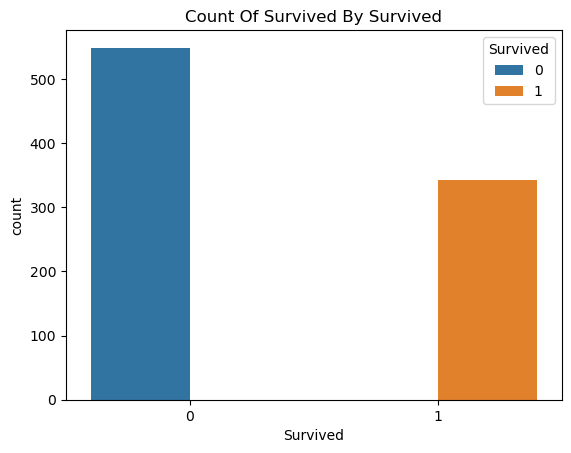

In [14]:
# Survival Bar
bar(train, "Survived")

Key Insights
- more passengers not survived than survived

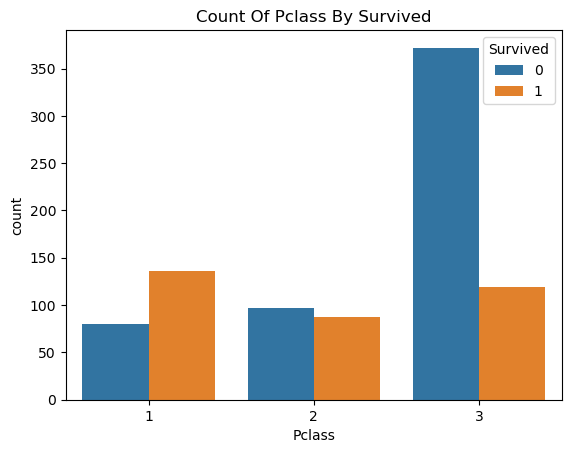

In [15]:
# Ticket Class Bar
bar(train, "Pclass")

Key Insights
- 3rd class had more non survived passengers than all other classes

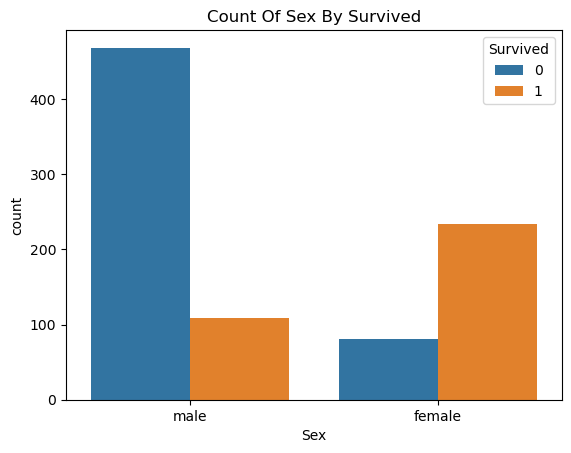

In [16]:
# Sex Bar
bar(train, "Sex")

Key Insights
- males had more non survived passengers than females

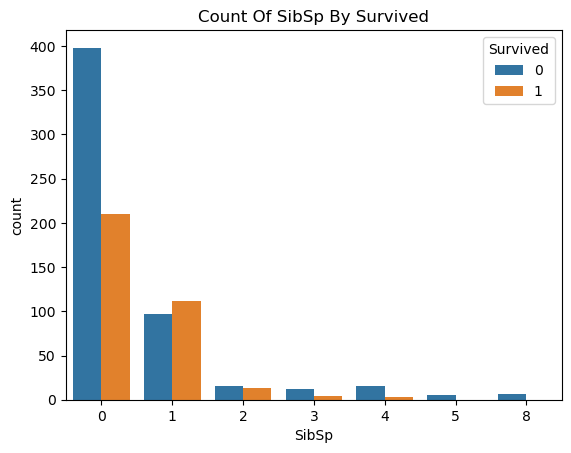

In [17]:
# Siblings Or Spouse Bar
bar(train, "SibSp")

Key Insights
- 0 siblings/spouse had more non survived passengers than all other siblings/spouse

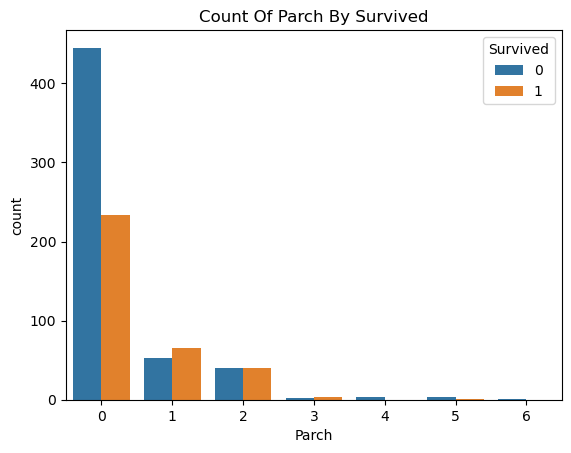

In [18]:
# Parents Or Children Bar
bar(train, "Parch")

Key Insights
- 0 children/parents had more non survived passengers than all other children/parents

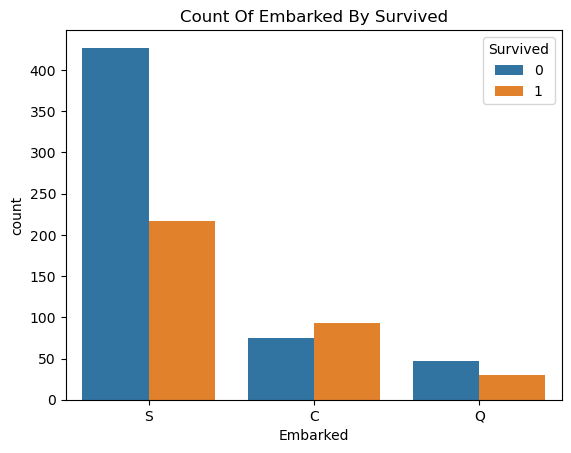

In [19]:
# Embark Bar
bar(train, "Embarked")

Key Insights
- southampton had more non survived passengers than all other ports

In [20]:
# Distribution Function
def dist(df, col) : 
    sns.distplot(df[col], hist = True, kde = True, bins = 20)
    plt.title(f"{col} Distribution")
    
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    plt.text(0.70, 0.90,
             f"Skewness = {skewness : .2f}",
             transform = plt.gca().transAxes)
    plt.text(0.70, 0.85,
             f"Kurtosis = {kurtosis : .2f}",
             transform = plt.gca().transAxes)
    return plt.show()

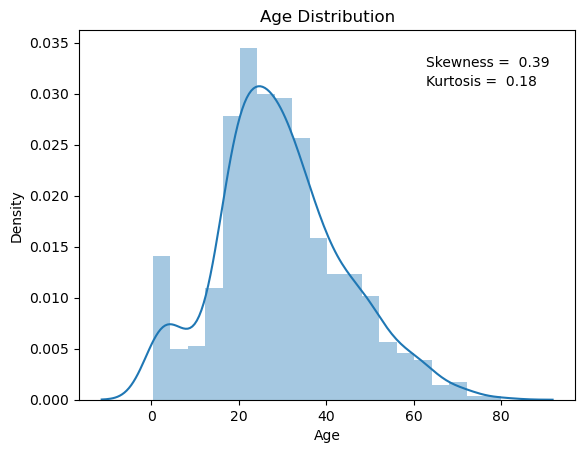

In [21]:
# Age Distribution
dist(train, "Age")

Key Insights
- histograms visualize the distribution of frequency
- kernel density estimates visualize the distribution of probability density
- the tail of the distribution extends to the right
- positive kurtosis imply high peakedness

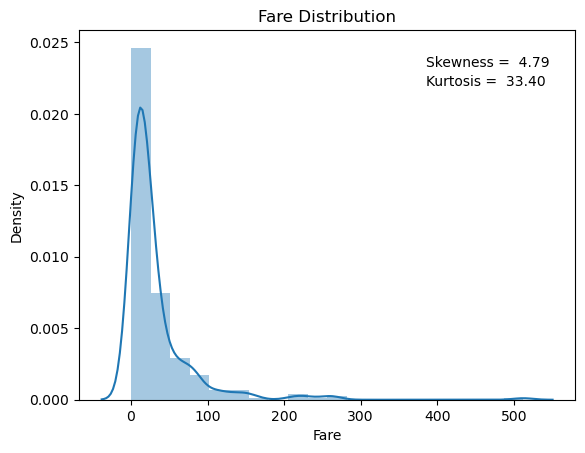

In [22]:
# Fare Distribution
dist(train, "Fare")

Key Insights
- histograms visualize the distribution of frequency
- kernel density estimates visualize the distribution of probability density
- the tail of the distribution extends to the right
- positive kurtosis imply high peakedness

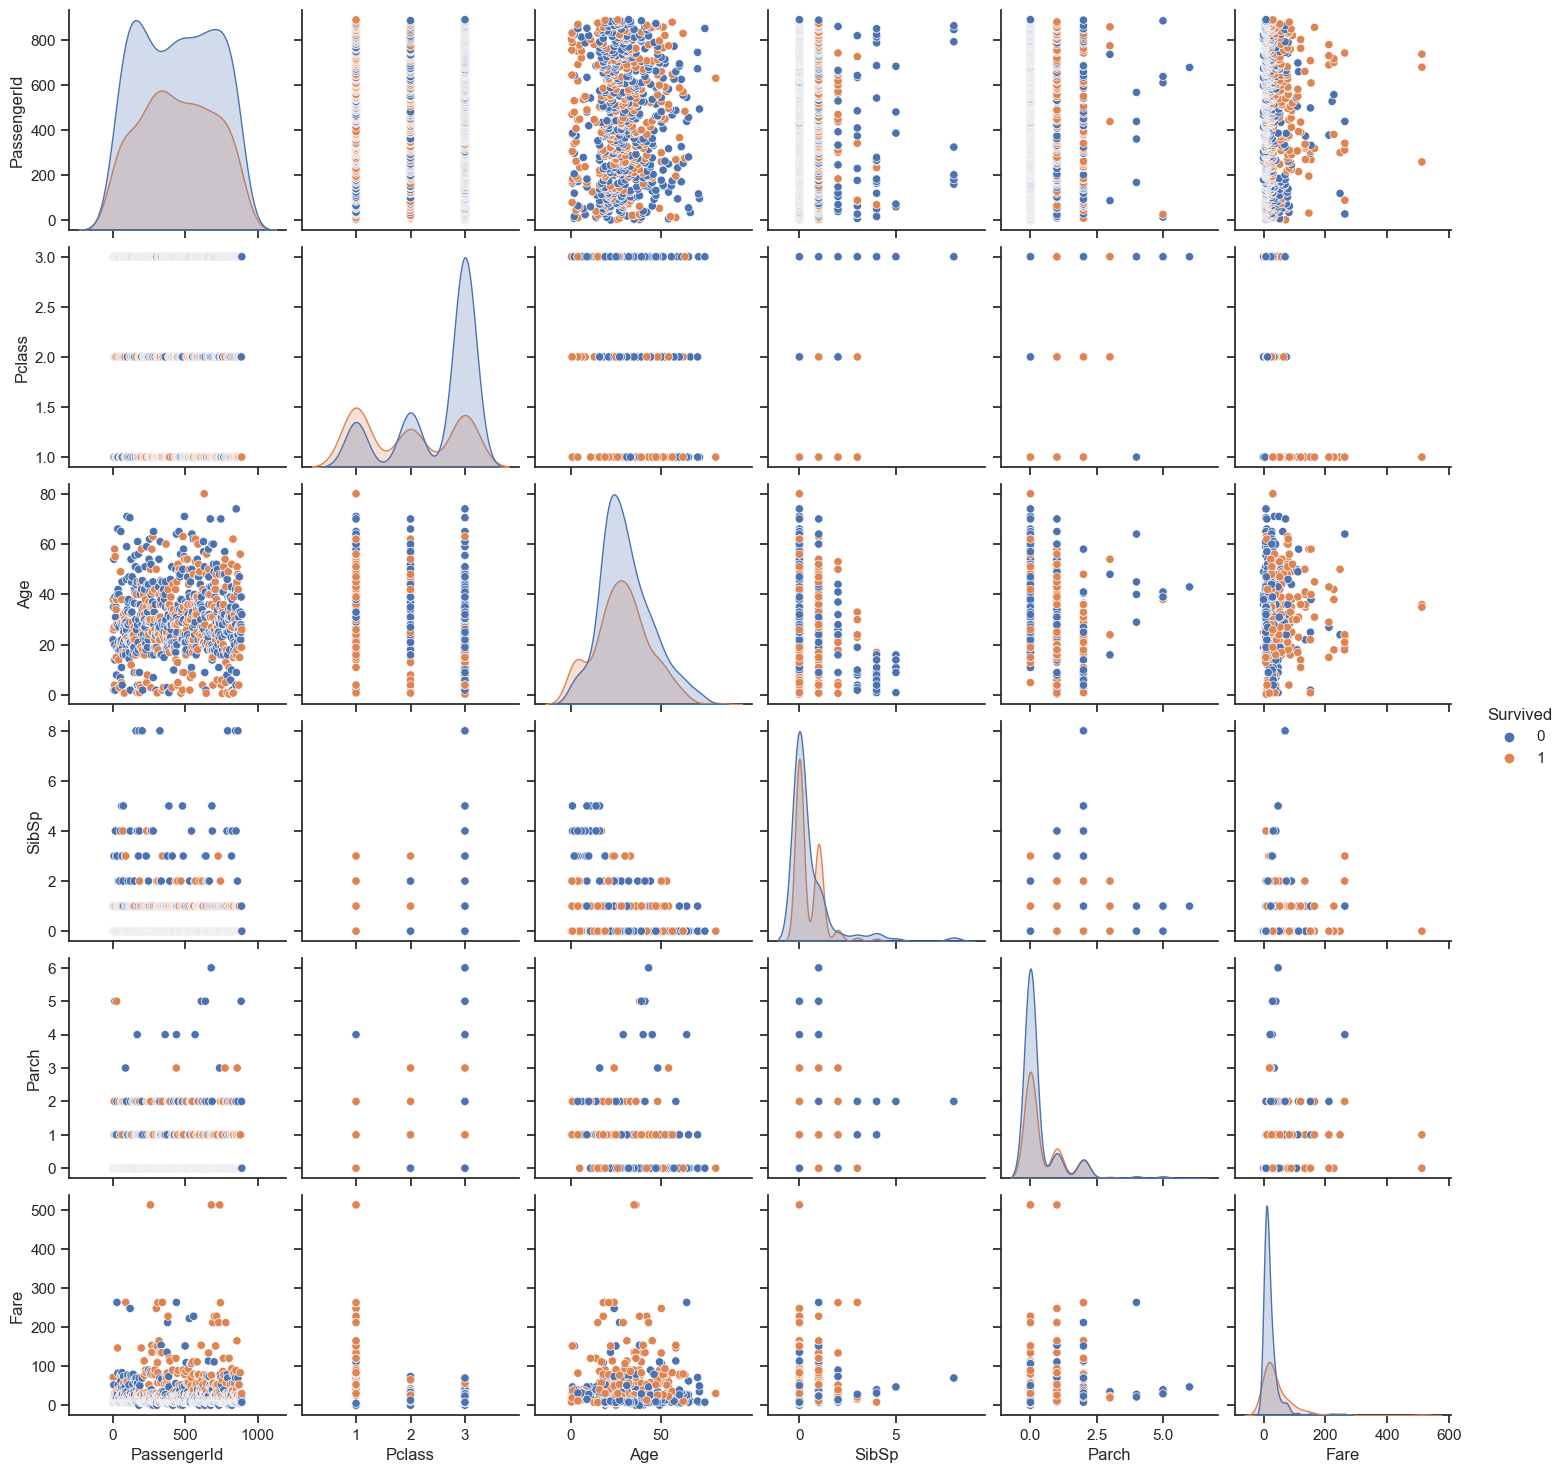

In [23]:
# Scatter
sns.set(style = "ticks")
sns.pairplot(train, hue = "Survived")
plt.show()

Key Insights
- scatterplots visualize the relationship between 2 variables

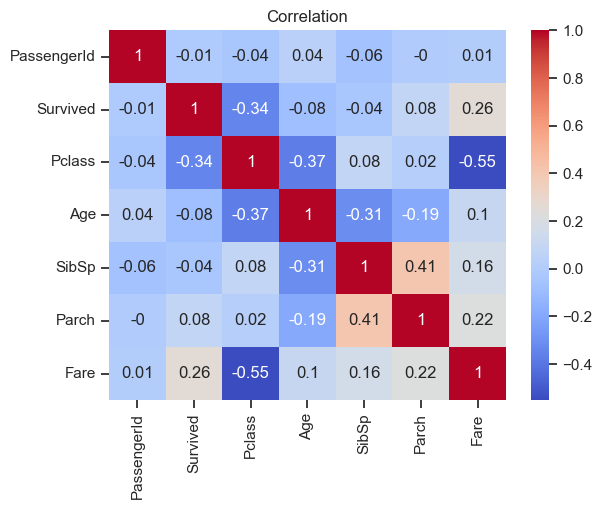

In [24]:
# Correlation
corr = train.corr().round(2)
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.title("Correlation")
plt.show()

Key Insights
- matrices visualize the pairwise relationship between 2 variables

# Transform

In [25]:
# List
trainTest = [train, test]

In [26]:
# Extract Title From Name
for dataset in trainTest : 
    dataset["Title"] = dataset["Name"].str.extract(" ([A-Za-z]+)\.")

train["Title"].value_counts() # Count Title

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [27]:
# Title Imputation
other = ["Dr",
         "Rev",
         "Major",
         "Col",
         "Countess",
         "Capt",
         "Sir",
         "Lady",
         "Don",
         "Dona",
         "Jonkheer"]

for dataset in trainTest : 
    dataset["Title"] = dataset["Title"].replace(other, "Other") # If Title Frequency < 10 Then Other
    
    dataset["Title"] = dataset["Title"].replace({"Mlle" : "Miss",
                                                "Ms" : "Miss",
                                                "Mme" : "Mrs"})

train["Title"].value_counts() # Count Title

Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: Title, dtype: int64

In [28]:
# Encode Title
titleMap = {"Mr" : 1,
           "Miss" : 2,
           "Mrs" : 3,
           "Master" : 4,
           "Other" : 5}

for dataset in trainTest : 
    dataset["Title"] = dataset["Title"].map(titleMap)
    dataset["Title"] = dataset["Title"].fillna(0)

train["Title"].value_counts() # Count Title

1    517
2    185
3    126
4     40
5     23
Name: Title, dtype: int64

In [29]:
# Encode Sex
sexMap = {"male" : 0, "female" : 1}

for dataset in trainTest : 
    dataset["Sex"] = dataset["Sex"].map(sexMap)
    
train["Sex"].value_counts() # Count Sex

0    577
1    314
Name: Sex, dtype: int64

In [30]:
# Embark Imputation
for dataset in trainTest : 
    dataset["Embarked"] = dataset["Embarked"].fillna("S")

In [31]:
# Encode Embark
portMap = {"S" : 0,
           "C" : 1,
           "Q" : 2}

for dataset in trainTest : 
    dataset["Embarked"] = dataset["Embarked"].map(portMap)
    
train["Embarked"].value_counts() # Count Embark

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [32]:
# Age Imputation
for dataset in trainTest : 
    ageAvg = dataset["Age"].mean()
    ageStd = dataset["Age"].std()
    ageNull = dataset["Age"].isnull().sum()
    
    ageRand = np.random.randint(ageAvg - ageStd, # Generate Random Nums Between Lower Bound & Upper Bound
                               ageAvg + ageStd,
                               size = ageNull)
    ageRand = dataset["Age"][np.isnan(dataset["Age"])] # Replace Nulls With Randon Nums

train["AgeBand"] = pd.cut(train["Age"], 5) # Five Age Bands
train.groupby("AgeBand")[["Survived"]].mean().reset_index() # Avg Age Band Survival

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [33]:
# Encode Age
ageBins = [0, 16, 32, 48, 64, np.inf]
ageLabs = [0, 1, 2, 3, 4]

for dataset in trainTest : 
    dataset["Age"] = pd.cut(dataset["Age"], bins = ageBins, labels = ageLabs, include_lowest = True)
    
train["Age"].value_counts() # Count Age

1    346
2    188
0    100
3     69
4     11
Name: Age, dtype: int64

In [34]:
# Fare Imputation
fareMed = train["Fare"].median()

for dataset in trainTest : 
    dataset["Fare"] = dataset["Fare"].fillna(fareMed)
    
train["FareBand"] = pd.qcut(train["Fare"], 4) # Four Fare Bands
train.groupby("FareBand")[["Survived"]].mean().reset_index() # Avg Fare Band Survival

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [35]:
# Encode Fare
fareBins = [0, 7.91, 14.45, 31, np.inf]
fareLabs = [0, 1, 2, 3]

for dataset in trainTest : 
    dataset["Fare"] = pd.cut(dataset["Fare"], bins = fareBins, labels = fareLabs, include_lowest = True)
    
train["Fare"].value_counts() # Count Fare

2    229
0    223
3    222
1    217
Name: Fare, dtype: int64

In [36]:
# Siblings/Spouse & Parents/Children
for dataset in trainTest : 
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1 # SibSp/Parch Not Include Passenger
    
train.groupby("FamilySize")[["Survived"]].mean().reset_index() # Avg Family Size Survival

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [37]:
# Alone
for dataset in trainTest : 
    dataset["Alone"] = 0
    dataset.loc[dataset["FamilySize"] == 1, "Alone"] = 1 # If Alone Then 1 Else 0
    
train.groupby("Alone")[["Survived"]].mean().reset_index() # Avg Alone Survival

,Alone,Survived
0,0,0.505650
1,1,0.303538


In [38]:
# Select Features
extra = ["Name", "SibSp", "Parch", "Ticket", "Cabin", "FamilySize"]

train = train.drop(extra, axis = 1)
train = train.drop(["PassengerId", "AgeBand", "FareBand"], axis = 1)

test = test.drop(extra, axis = 1)

# Model

In [39]:
# Split Datasets
xTrain = train.drop("Survived", axis = 1)
yTrain = train["Survived"]
xTest = test.drop("PassengerId", axis = 1).copy()

my experiment will test which ML algorithm predicts survival outcome with the highest accuracy
- logistic regression
- support vector machines
- linear SVC
- k nearest neighbor
- decision tree
- random forest
- naive bayes
- perceptron
- stochastic gradient descent

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

In [41]:
# Classification Function
def clf(model) : 
    clf = model.fit(xTrain, yTrain)
    preds = clf.predict(xTest)
    acc = round(clf.score(xTrain, yTrain) * 100, 2)
    return acc

In [42]:
# Logistic Regression
logReg = clf(LogisticRegression())

# Support Vector Machine
svc = clf(SVC())

# Linear Support Vector Machine
svcLin = clf(LinearSVC())

# K Nearest Neighbors
knn = clf(KNeighborsClassifier(n_neighbors = 3))

# Decision Tree
dt = clf(DecisionTreeClassifier())

# Random Forest
rf = clf(RandomForestClassifier(n_estimators = 100))

# Naive Bayes
nb = clf(GaussianNB())

# Perceptron
ptron = clf(Perceptron(max_iter = 5, tol = None))

# Stochastic Gradient Descent
sgd = clf(SGDClassifier(max_iter = 5, tol = None))

In [43]:
# Accuracy
model = pd.DataFrame({"Model" : ["Logistic Regression",
                                 "Support Vector Machine",
                                 "Linear SVC",
                                 "KNN",
                                 "Decision Tree",
                                 "Random Forest",
                                 "Naive Bayes",
                                 "Perceptron",
                                 "Stochastic Gradient Descent"],
                      "Accuracy" : [logReg,
                                 svc,
                                 svcLin,
                                 knn,
                                 dt,
                                 rf,
                                 nb,
                                 ptron,
                                 sgd]})

model.sort_values(by = "Accuracy", ascending = False).reset_index(drop = True)

,Model,Accuracy
0,Decision Tree,87.43
1,Random Forest,87.43
2,Support Vector Machine,83.73
3,KNN,83.73
4,Perceptron,79.69
5,Logistic Regression,79.24
6,Linear SVC,78.45
7,Naive Bayes,76.99
8,Stochastic Gradient Descent,75.08


Key Insights
- decision tree & random forest both have the highest accuracy but random forest have less overfit and better generalization
- random forests randomly select subsets of features at each level of every decision tree which reduces correlation between trees and prevents the ability of single features to dominate the decision process
- random forests apply ensemble methods to get the majority vote or weighted average of predictions from several decision trees which mitigate overfit to patterns or noise from individual trees

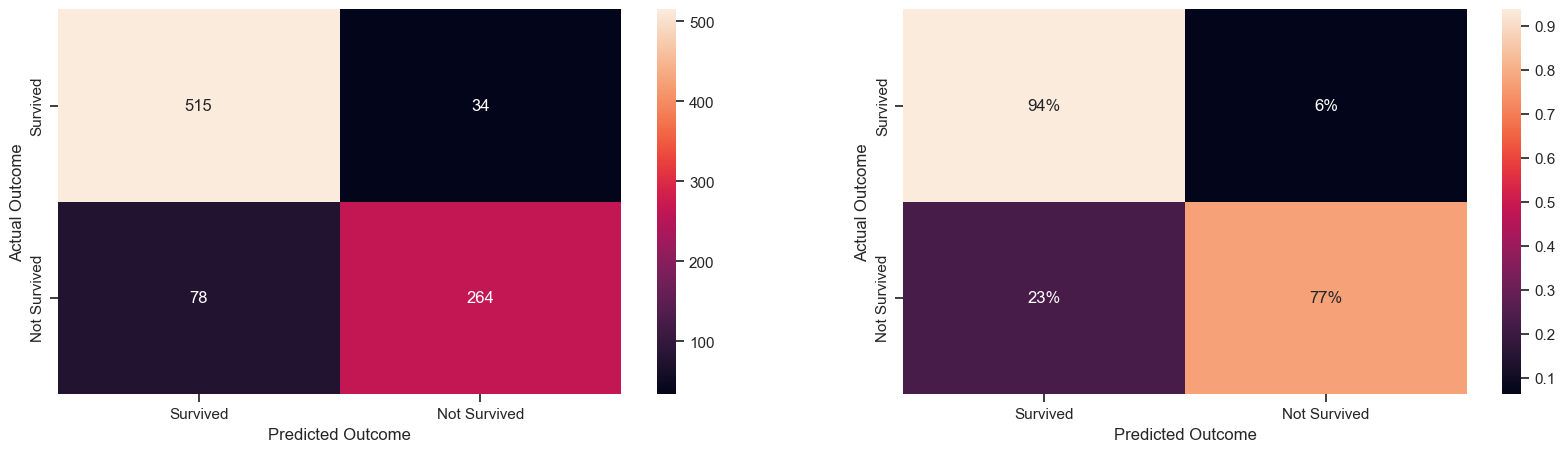

In [44]:
# Confusion Matrix
model = RandomForestClassifier(n_estimators = 100) # Random Forest
clf = model.fit(xTrain, yTrain)
preds = clf.predict(xTrain)
acc = round(clf.score(xTrain, yTrain) * 100, 2)

cnfMatrix = confusion_matrix(yTrain, preds) # Confusion Matrix
cnfMatrixPer = cnfMatrix / cnfMatrix.sum(axis = 1, keepdims = True)

predOutcome = ["Survived", "Not Survived"] # Confusion Matrix Outcomes
actOutcome = ["Survived", "Not Survived"]

cnfDf = pd.DataFrame(cnfMatrix, index = actOutcome, columns = predOutcome) # Matrix -> DataFrame
cnfPerDf = pd.DataFrame(cnfMatrixPer, index = actOutcome, columns = predOutcome)

fig, ax = plt.subplots(1, 2, figsize = (20, 5)) # Plot Confusion
sns.heatmap(cnfDf, annot = True, fmt = "d", ax = ax[0])
sns.heatmap(cnfPerDf, annot = True, fmt = "0.0%", ax = ax[1])
for axis in ax : 
    axis.set(xlabel = "Predicted Outcome", ylabel = "Actual Outcome")
plt.show()

Key Insights
- confusion matrices visualize the true positives, true negatives, false positives, and false negatives of classification models

In [45]:
# Submission
model = RandomForestClassifier(n_estimators = 100) # Random Forest
clf = model.fit(xTrain, yTrain)
preds = clf.predict(xTest)
acc = round(clf.score(xTrain, yTrain) * 100, 2)

submission = pd.DataFrame({"PassengerId" : test["PassengerId"],
                           "Survived" : preds})
submission.to_csv("/Users/tgut03/Jupyter/Data/Titanic Predictions.csv", index = False)

# Conclusion
To conclude, my model correctly predicted Titanic passenger survival rate by 87.43%.